In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

## 1) Detecting outliers
Assume the errors in the datapoints are white Gaussian noise

In [2]:
[os.system(f'wget strw.leidenuniv.nl/~nobels/coursedata/dataset{i}.txt') 
 for i in range(1,6) ]

[0, 0, 0, 0, 0]

In [3]:
ls

dataset1.txt    dataset2.txt.1  dataset4.txt    dataset5.txt.1
dataset1.txt.1  dataset3.txt    dataset4.txt.1  tutorial8.ipynb
dataset2.txt    dataset3.txt.1  dataset5.txt


In [4]:
def linleastsquares(X, y):
    """
    Fit linear least squares, given a matrix X
    X = shape (num_params,observations) (2,100)
    y = observed data values -- shape = (100,)
    
    returns beta -- best fit parameters -- shape (2,)
    """
    beta = np.dot((np.dot( np.linalg.inv(np.dot(X.T,X)), X.T)),y)   
    return beta

In [5]:
data = np.loadtxt('./dataset1.txt') # shape (100,2)

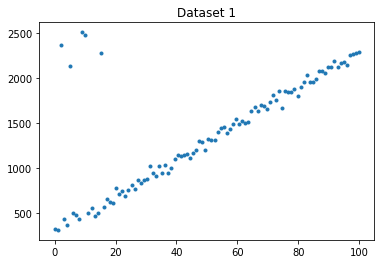

In [6]:
plt.plot(data[:,0],data[:,1],'.')
plt.title("Dataset 1")
plt.show()

(100, 2) (100,)


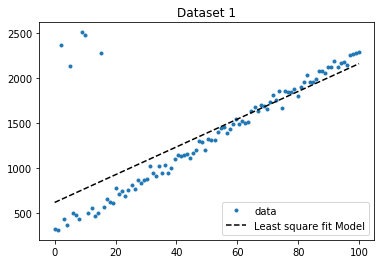

In [7]:
x_values = data[:,0]
y_values = data[:,1]

# Fit a linear model y = ax+b
X = np.array([ x_values, np.ones(len(x_values))]).T
print (np.shape(X),np.shape(y_values))
ahat, bhat = linleastsquares(X,y_values)
model = lambda x: ahat*x+bhat

plt.title("Dataset 1")
plt.plot(data[:,0],data[:,1],'.',label='data')
plt.plot(x_values,model(x_values),c='k',label='Least square fit Model',
        ls='dashed')
plt.legend()
plt.show()
plt.show()

## c) Now use robust estimation

If we assume the errors are white Gaussian noise, then $\sigma_i$ = $\sigma$ and we can remove it from the equation.


In [33]:
def neglogGauss(z):
    """Negative log likelihood for normal dist"""
    return 0.5*z**2
def phizGauss(z):
    """derivative of neglogGuass wrt z"""
    return z

Actually, we are allowed to just use easy versions of robust estimation. So just calculate the standard deviation of the difference of the points and the line, and then see which ones are many std from the line

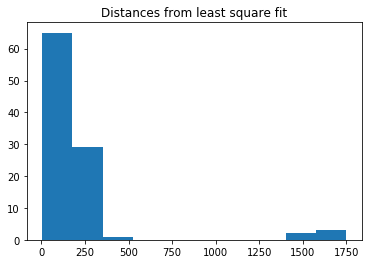

In [39]:
distances = abs(model(x_values) - data[:,1])
stdistance = np.std(distances)
plt.hist(distances)
plt.title("Distances from least square fit")
plt.show()

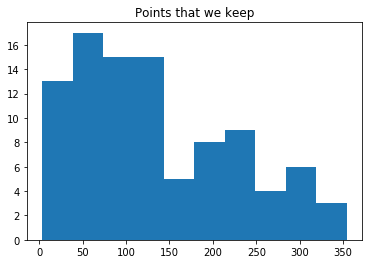

In [46]:
# Remove all points that have distance > 4 sigma
indices_keep = [distances < 4*stdistance]
plt.hist(distances[indices_keep])
plt.title("Points that we keep")
plt.show()

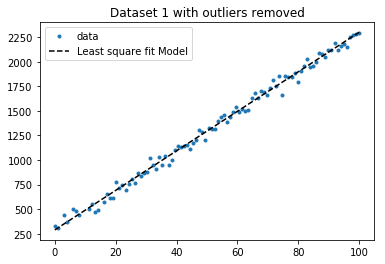

In [49]:
x_values = data[:,0]
y_values = data[:,1]

indices_keep = [distances < 4*stdistance]
x_values = x_values[indices_keep]
y_values = y_values[indices_keep]

# Fit a linear model y = ax+b
X = np.array([ x_values, np.ones(len(x_values))]).T
ahat, bhat = linleastsquares(X,y_values)
model = lambda x: ahat*x+bhat

plt.title("Dataset 1 with outliers removed")
plt.plot(x_values,y_values,'.',label='data')
plt.plot(x_values,model(x_values),c='k',label='Least square fit Model',
        ls='dashed')
plt.legend()
plt.show()
plt.show()

## 2) Chi squared test problem